In [1]:
# Import libraries.
import os
import requests


import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)

In [3]:
if not os.path.exists('insurance.csv'):
    url = 'https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv'
    response = requests.get(url)
    with open('insurance.csv', 'wb') as file:
        file.write(response.content)

dataset = pd.read_csv('insurance.csv')
dataset.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
fig = px.histogram(dataset,
                   x='age',
                   marginal='box',
                   nbins=47,
                   title='Distribution of Age')
fig.update_layout(bargap=0.1)
fig.show()

In [6]:
fig = px.histogram(dataset,
                   x='bmi',
                   marginal='box',
                   color_discrete_sequence=['red'],
                   title='Distribution of BMI (Body Mass Index)')
fig.update_layout(bargap=0.1)
fig.show()

In [7]:
fig = px.histogram(dataset,
                   x='expenses',
                   marginal='box',
                   color='smoker',
                   color_discrete_sequence=['green', 'grey'],
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

In [8]:
dataset.smoker.value_counts()

,count
smoker,
no,1064
yes,274


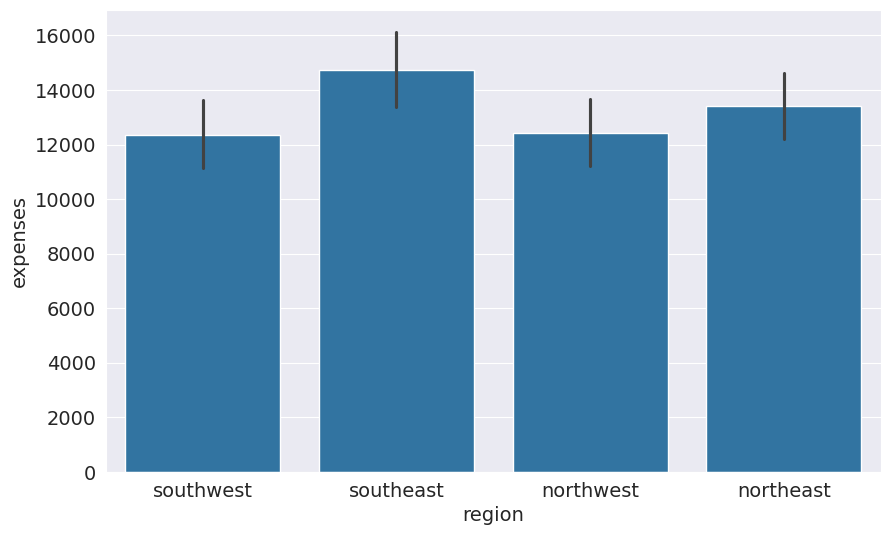

In [9]:
sns.barplot(data=dataset, x='region', y='expenses');

In [10]:
obj_cols = dataset.select_dtypes('object').columns.tolist()

In [11]:
df = dataset.copy()
df = pd.get_dummies(df, columns=obj_cols).astype('int')
df.head()

,age,bmi,children,expenses,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27,0,16884,1,0,0,1,0,0,0,1
1,18,33,1,1725,0,1,1,0,0,0,1,0
2,28,33,3,4449,0,1,1,0,0,0,1,0
3,33,22,0,21984,0,1,1,0,0,1,0,0
4,32,28,0,3866,0,1,1,0,0,1,0,0


In [12]:
num_cols = dataset.select_dtypes(include=np.number).columns.tolist()
num_cols.remove('expenses')

In [14]:
## Scale the numerical features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])
df.head()

,age,bmi,children,expenses,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,0.021739,0.297297,0.0,16884,1,0,0,1,0,0,0,1
1,0.000000,0.459459,0.2,1725,0,1,1,0,0,0,1,0
2,0.217391,0.459459,0.6,4449,0,1,1,0,0,0,1,0
3,0.326087,0.162162,0.0,21984,0,1,1,0,0,1,0,0
4,0.304348,0.324324,0.0,3866,0,1,1,0,0,1,0,0


In [15]:
from sklearn.model_selection import train_test_split
train_dataset, test_dataset = train_test_split(df, test_size=0.2, random_state=0)

train_features = train_dataset.copy()
test_features = test_dataset.copy()

# Remove the target from features and return it at the assighned variable
train_labels = train_features.pop('expenses')
test_labels = test_features.pop('expenses')

In [16]:
model = keras.Sequential()
model.add(layers.Input(shape=(11,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1))

model.compile(optimizer='adam', loss='mae', metrics=['mae', 'mse'])
history = model.fit(train_features, train_labels, validation_split=0.2, epochs=100, verbose=2)

Epoch 1/100
27/27 - 3s - 101ms/step - loss: 12872.9756 - mae: 12872.9756 - mse: 304005408.0000 - val_loss: 14507.1807 - val_mae: 14507.1807 - val_mse: 371981120.0000
Epoch 2/100
27/27 - 0s - 6ms/step - loss: 12870.4805 - mae: 12870.4805 - mse: 303938560.0000 - val_loss: 14503.1484 - val_mae: 14503.1484 - val_mse: 371859008.0000
Epoch 3/100
27/27 - 0s - 6ms/step - loss: 12863.8594 - mae: 12863.8594 - mse: 303765536.0000 - val_loss: 14492.5371 - val_mae: 14492.5371 - val_mse: 371541184.0000
Epoch 4/100
27/27 - 0s - 6ms/step - loss: 12847.5967 - mae: 12847.5967 - mse: 303343584.0000 - val_loss: 14468.5586 - val_mae: 14468.5586 - val_mse: 370822272.0000
Epoch 5/100
27/27 - 0s - 11ms/step - loss: 12814.3750 - mae: 12814.3750 - mse: 302438912.0000 - val_loss: 14423.3760 - val_mae: 14423.3760 - val_mse: 369478144.0000
Epoch 6/100
27/27 - 0s - 11ms/step - loss: 12756.2959 - mae: 12756.2959 - mse: 300892768.0000 - val_loss: 14349.1602 - val_mae: 14349.1602 - val_mse: 367281120.0000
Epoch 7/100


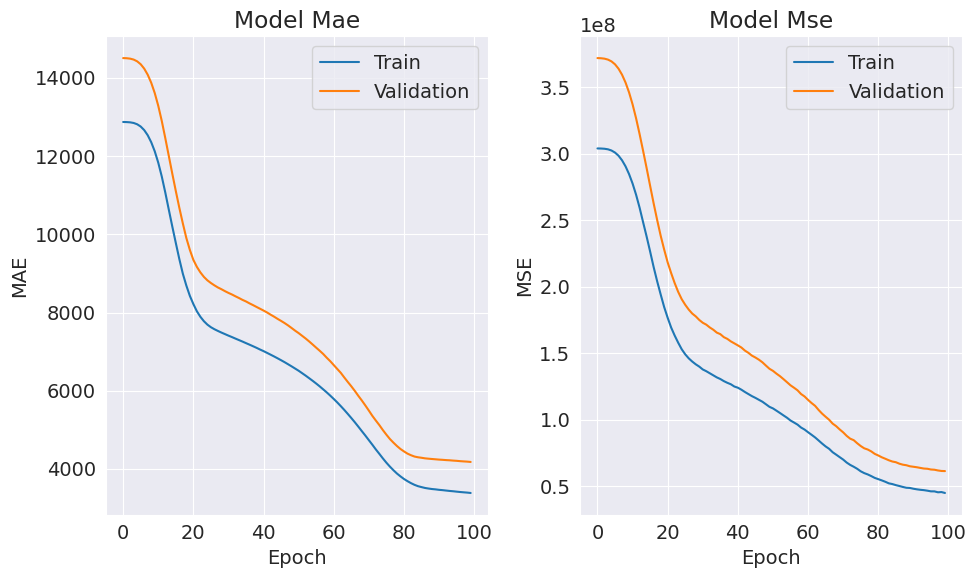

In [17]:
def plot_loss(history, metric='mae'):
    plt.plot(history.history[metric])
    plt.plot(history.history[f'val_{metric}'])
    plt.title(f'Model {metric.title()}')
    plt.xlabel('Epoch')
    plt.ylabel(metric.upper())
    plt.legend(['Train', 'Validation'], loc='upper right')

plt.subplot(1, 2, 1)
plot_loss(history, 'mae')
plt.subplot(1, 2, 2)
plot_loss(history, 'mse')

plt.tight_layout()
plt.show()

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


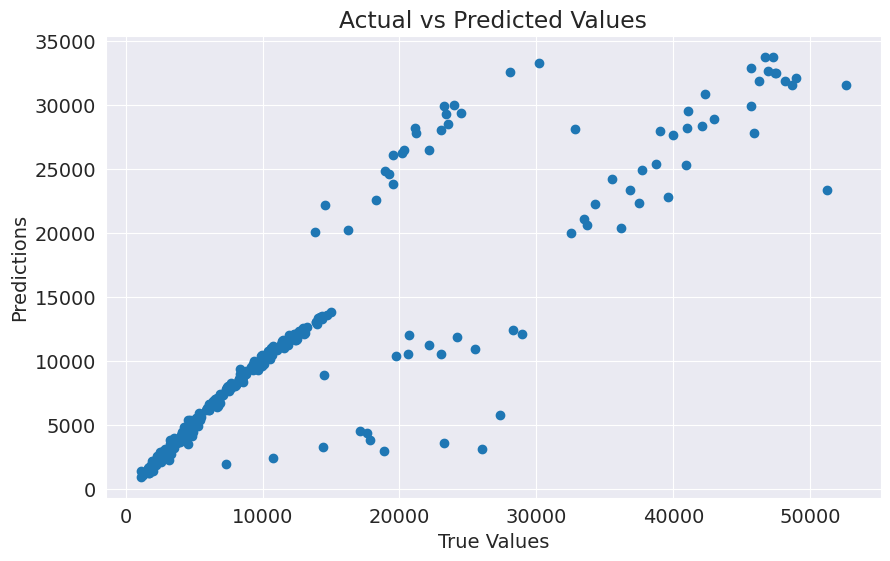

Mean Absolute Error (MAE): 3467.31
Mean Squared Error (MSE): 44644928.00


In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
# Make predictions on the test set
predictions = model.predict(test_features)

# Visualize actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(test_labels, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Actual vs Predicted Values')
plt.show()

# Calculate and print evaluation metrics
mae = mean_absolute_error(test_labels, predictions)
mse = mean_squared_error(test_labels, predictions)
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')

In [19]:
# Get a list of categorical variables
obj_cols = dataset.select_dtypes('object').columns.tolist()

In [20]:
'''
If the categories have a natural order (e.g. cold, neutral, warm, hot), then they can be converted to
numbers (e.g. 1, 2, 3, 4) preserving the order. These are called ordinals.
# '''
# from sklearn.preprocessing import OrdinalEncoder
# df = dataset.copy()
# oe = OrdinalEncoder()
# df[obj_cols] = oe.fit_transform(df[obj_cols])

# However, in this case, the categories do not have a natural order
from sklearn.preprocessing import LabelEncoder
df = dataset.copy()
le = LabelEncoder()
df['region'] = le.fit_transform(df['region'])
df['sex'] = le.fit_transform(df['sex'])
df['region'] = le.fit_transform(df['region'])
df['smoker'] = le.fit_transform(df['smoker'])

df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,3,16884.92
1,18,1,33.8,1,0,2,1725.55
2,28,1,33.0,3,0,2,4449.46
3,33,1,22.7,0,0,1,21984.47
4,32,1,28.9,0,0,1,3866.86


In [21]:
from sklearn.model_selection import train_test_split

train_dataset, test_dataset = train_test_split(df, test_size=0.2, random_state=0)

train_features = train_dataset.copy()
test_features = test_dataset.copy()

# Removes the target from features and returns it at the assighned variable
train_labels = train_features.pop('expenses')
test_labels = test_features.pop('expenses')

In [22]:
# Linear Regression
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(train_features, train_labels)
pred_labels = model.predict(test_features)

from sklearn import metrics
mae = metrics.mean_absolute_error(test_labels, pred_labels)
mse = metrics.mean_squared_error(test_labels, pred_labels)
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')

Mean Absolute Error (MAE): 3930.22
Mean Squared Error (MSE): 31841055.89


In [23]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(random_state=0).fit(train_features, train_labels)
pred_labels = model.predict(test_features)

from sklearn import metrics
mae = metrics.mean_absolute_error(test_labels, pred_labels)
mse = metrics.mean_squared_error(test_labels, pred_labels)
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')

Mean Absolute Error (MAE): 2474.73
Mean Squared Error (MSE): 16569842.09


In [31]:
'''
In a 2D array axis=1 or axis=-1 can be used interchangeably, since when -1 is selected
the last axis of the input is assumed to be a feature dimension and is normalized per index,
hence column-wise.
'''
from keras.layers import Normalization

normalizer = Normalization(axis=-1)
normalizer.adapt(np.array(train_features))
head = np.array(train_features[:5])

with np.printoptions(precision=2, suppress=True):
    print('First 5 rows:', head)
    print()
    print('Normalized:', normalizer(head).numpy())

First 5 rows: [[37.   1.  34.1  4.   1.   3. ]
 [18.   1.  34.4  0.   0.   2. ]
 [23.   0.  36.7  2.   1.   0. ]
 [32.   1.  35.2  2.   0.   3. ]
 [58.   0.  32.4  1.   0.   0. ]]

Normalized: [[-0.15  1.02  0.54  2.41  1.97  1.31]
 [-1.5   1.02  0.59 -0.89 -0.51  0.4 ]
 [-1.14 -0.99  0.97  0.76  1.97 -1.4 ]
 [-0.5   1.02  0.72  0.76 -0.51  1.31]
 [ 1.34 -0.99  0.27 -0.07 -0.51 -1.4 ]]


In [27]:
train_features.shape[1:]

(6,)

In [32]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Normalization
import numpy as np

# Normalize the input features
normalizer = Normalization(input_shape=train_features.shape[1:], axis=-1)
normalizer.adapt(np.array(train_features))

# Build the model
model = keras.Sequential([
    normalizer,
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mae', metrics=['mae', 'mse'])

# Train the model
history = model.fit(train_features, train_labels, validation_split=0.2, epochs=100, verbose=0)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



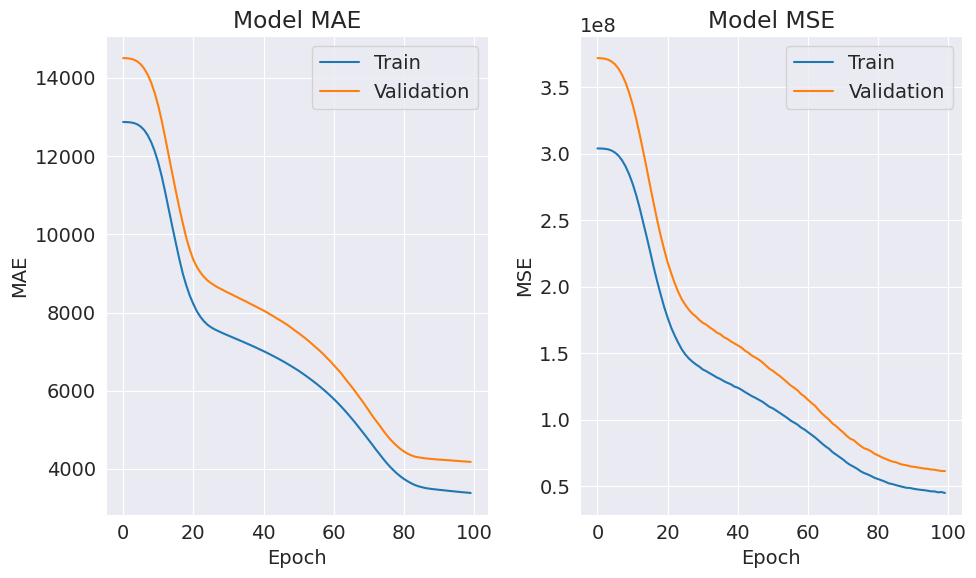

In [29]:
def plot_metric(history, metric='mae'):

    plt.plot(history.history[metric])
    plt.plot(history.history[f'val_{metric}'])
    plt.title(f'Model {metric.upper()}')
    plt.xlabel('Epoch')
    plt.ylabel(metric.upper())
    plt.legend(['Train', 'Validation'], loc='upper right')


plt.subplot(1, 2, 1)
plot_metric(history, 'mae')
plt.subplot(1, 2, 2)
plot_metric(history, 'mse')
plt.tight_layout()
plt.show()

9/9 - 0s - 9ms/step - loss: 3197.3813 - mae: 3197.3813 - mse: 39451696.0000
Testing set Mean Abs Error: 3197.38 expenses
You passed the challenge. Great job!
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


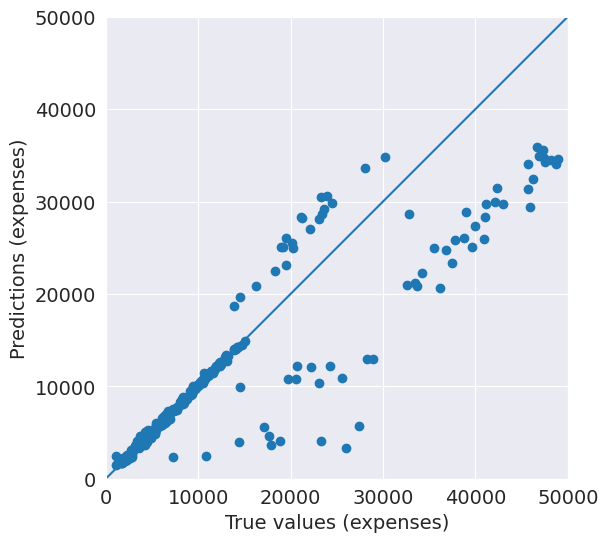

In [33]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.

# loss, mae, mse = linear_model.evaluate(test_features, test_labels, verbose=2)
loss, mae, mse = model.evaluate(test_features, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)